<a href="https://colab.research.google.com/github/arivval123/D4-matrikulasi/blob/main/tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import glob
from math import log10, sqrt

Gamma Correction pada citra
--------------------------------
Masukan Nilai bit depth : 3


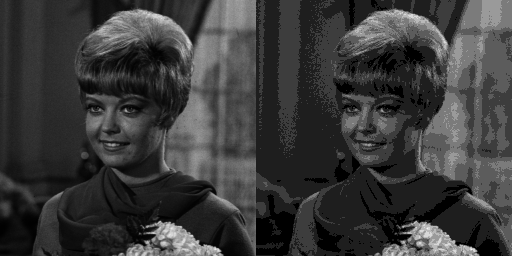

In [3]:
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  bit = int(input('Masukan Nilai bit depth : '))
except ValueError:
  print('Error, not a number')
  

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(img.shape, img.dtype)

level = 255/(2**bit)-1

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    depth_image[y,x] = np.clip(round(img[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((img, depth_image))
cv2_imshow(final_frame)

In [23]:
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.536862071429155 (dB)


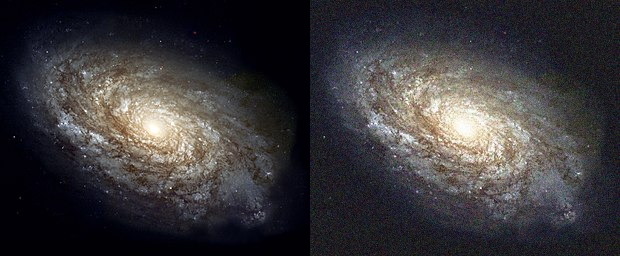

In [24]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.522521686160534 (dB)


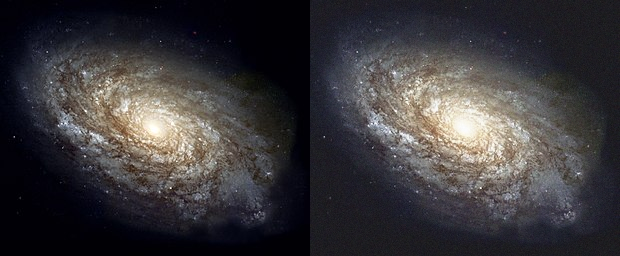

In [25]:
#Citra = 30
dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)